# Exercises 1: Requests and JSON


In [ ]:
import requests
import pandas as pd
from datetime import timedelta, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data


#Mount GDrive in sidebar
PATH = '/content/drive/MyDrive/Colab Notebooks/data/'
url = 'https://python.zgulde.net/api/v1/'

In [ ]:
#how many pages in sales?
data = requests.get(url+'sales').json()
pages = data['payload']['max_page']
pages

183

In [ ]:
def return_df(url, df_name):
  data = requests.get(url + df_name).json()

  if df_name == 'sales':
    pages = data['payload']['max_page']
    df = pd.DataFrame(data['payload'][df_name])

    for p in range(2, pages+1):
      url2 = url + df_name + f'?page={p}'
      data = requests.get(url2).json()
      df = pd.concat([df, pd.DataFrame(data['payload'][df_name])])
  
  else:
    df = pd.DataFrame(data['payload'][df_name])

  return df

In [ ]:
df_items = return_df(url, 'items')
#uncomment below to reload, takes about 5 minutes
df_sales = return_df(url, 'sales') 
df_stores = return_df(url, 'stores')

In [ ]:
#so id column matches column in sales
df_stores.rename(columns={'store_id':'store'}, inplace=True)
df_items.rename(columns={'item_id':'item'}, inplace=True)

In [ ]:
df = df_sales.merge(df_stores)
df = df.merge(df_items)
df.head()


,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [ ]:
df.shape

(365200, 14)

In [ ]:
#save to drive (61 MB)
df.to_csv(PATH + 'codeup_sales', index=False)

Open Power Systems Data for Germany includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017.

In [ ]:
url =  'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df2 = pd.read_csv(url)
df2.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [ ]:
#save to drive (200 KB)
df2.to_csv(PATH + 'codeup_power', index=False)

# Exercises 2: Time Series in Pandas

In [ ]:
#!pip install vega_datasets

sf = data.sf_temps()
sea = data.seattle_weather()
fly = data.flights_20k()

sf = sf.set_index('date')
sea = sea.set_index('date')
fly = fly.set_index('date')

San Francisco

    Resample by the day and take the average temperature. Visualize the average temperature over time.
    Write the code necessary to visualize the minimum temperature over time.
    Write the code necessary to visualize the maximum temperature over time.
    Which month is the coldest, on average?
    Which month has the highest average temperature?
    Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
    Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [ ]:
#resample by new datetime index
sf_daily = sf.resample('D').mean()
sf_daily['min'] = sf.resample('D').min()
sf_daily['max'] = sf.resample('D').max()

sf_daily.head()


,temp,min,max
date,,,
2010-01-01,49.170833,45.8,53.3
2010-01-02,49.304167,46.0,53.4
2010-01-03,49.391667,46.1,53.5
2010-01-04,49.445833,46.1,53.6
2010-01-05,49.491667,46.1,53.8


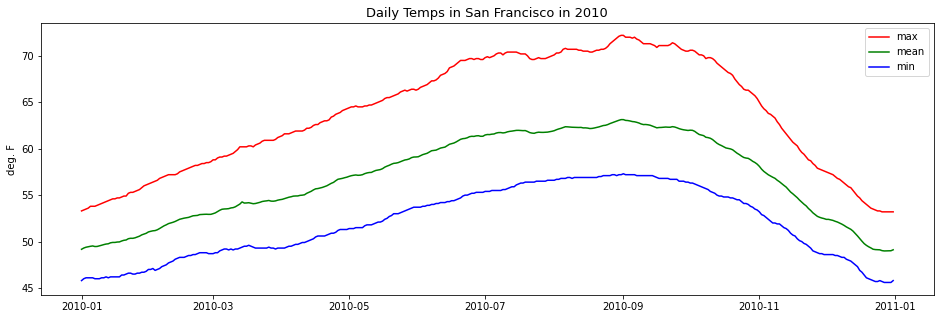

In [ ]:
plt.figure(figsize=(16,5))

sns.lineplot(data=sf_daily, x='date', y='max', color='red')
sns.lineplot(data=sf_daily, x='date', y='temp', color='green')
sns.lineplot(data=sf_daily, x='date', y='min', color='blue')

plt.title('Daily Temps in San Francisco in 2010', fontsize=13)
plt.xlabel('')
plt.ylabel('deg. F')
plt.legend(['max','mean','min']);

In [ ]:
sf_monthly = sf.resample('M').mean()
sf_monthly['min'] = sf.resample('M').min()
sf_monthly['max'] = sf.resample('M').max()

sf_monthly.index = sf_monthly.index.month_name()
sf_monthly

,temp,min,max
date,,,
January,49.984140,45.8,56.2
February,52.243899,46.9,58.6
March,53.956528,48.7,61.3
April,55.633056,49.3,64.3
May,57.970968,51.4,66.4
June,60.444722,53.7,69.7
July,61.765457,55.4,70.4
August,62.405376,56.6,72.2
September,62.487083,56.4,72.2


In [ ]:
hottest_month = sf_monthly.iloc[np.argmax(sf_monthly.temp)].name
coldest_month = sf_monthly.iloc[np.argmin(sf_monthly.temp)].name

f'{hottest_month} is hottest. {coldest_month} is coldest'

'September is hottest. January is coldest'

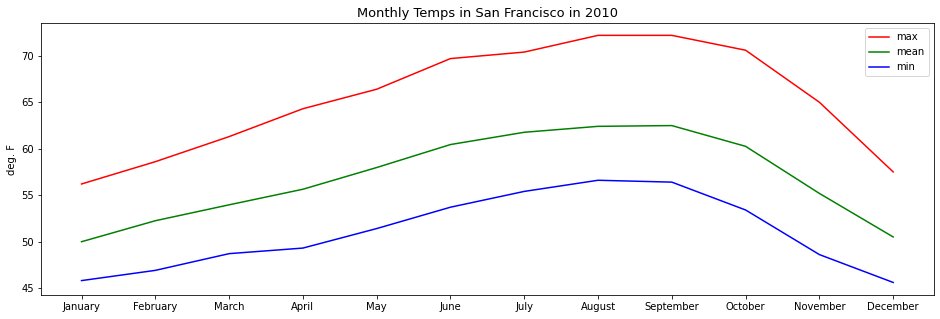

In [ ]:
plt.figure(figsize=(16,5))

sns.lineplot(data=sf_monthly, x='date', y='max', color='red')
sns.lineplot(data=sf_monthly, x='date', y='temp', color='green')
sns.lineplot(data=sf_monthly, x='date', y='min', color='blue')

plt.title('Monthly Temps in San Francisco in 2010', fontsize=13)
plt.xlabel('')
plt.ylabel('deg. F')
plt.legend(['max','mean','min']);

Seattle

    Which year and month combination has the highest amount of precipitation?
    Visualize the amount of monthly precipitation over time.
    Visualize the amount of wind over time. Choose a time interval you think is appropriate.
    Which year-month combination is the windiest?
    What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
    In which month does it rain the most?
    Which month has the most number of days with a non-zero amount of precipitation?



In [ ]:
sea.groupby('weather').count()

,precipitation,temp_max,temp_min,wind
weather,,,,
drizzle,54,54,54,54
fog,411,411,411,411
rain,259,259,259,259
snow,23,23,23,23
sun,714,714,714,714


In [ ]:
sea_monthly = sea.resample('M').mean()
sea_monthly.index = sea_monthly.index.strftime('%Y-%m')
sea_monthly.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01,5.590323,7.054839,1.541935,3.900000
2012-02,3.182759,9.275862,3.203448,3.903448
2012-03,5.903226,9.554839,2.838710,4.248387
2012-04,2.270000,14.873333,5.993333,3.373333
2012-05,1.683871,17.661290,8.190323,3.354839


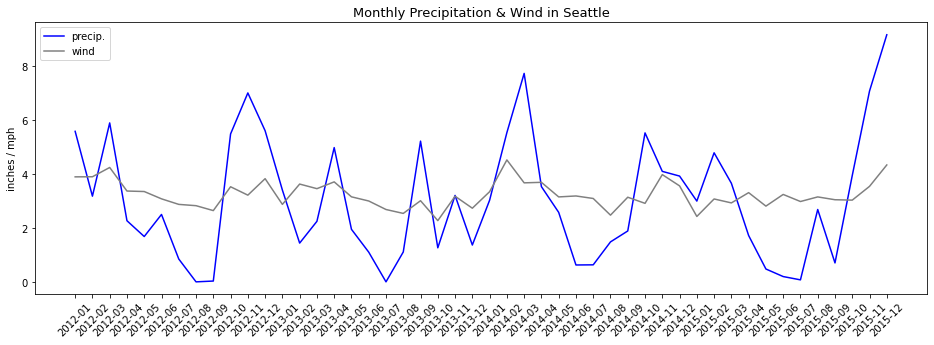

In [ ]:
plt.figure(figsize=(16,5))

sns.lineplot(data=sea_monthly, x='date', y='precipitation', color='blue')
sns.lineplot(data=sea_monthly, x='date', y='wind', color='gray')

plt.title('Monthly Precipitation & Wind in Seattle', fontsize=13)
plt.xlabel('')
plt.ylabel('inches / mph')
plt.xticks(rotation=45)
plt.legend(['precip.','wind']);

In [ ]:
most_precipitation = sea_monthly.iloc[np.argmax(sea_monthly.precipitation)].name
most_wind = sea_monthly.iloc[np.argmax(sea_monthly.wind)].name

f'{most_precipitation} is rainiest/snowiest and {most_wind} is windiest'


'2015-12 is rainiest/snowiest and 2014-02 is windiest'

Flights

    Convert any negative delays to 0.
    Which hour of the day has the highest average delay?
    Does the day of the week make a difference in the delay amount?
    Does the month make a difference in the delay amount?



In [ ]:
delays = []
for x in fly.delay:
  delays.append(max(x, 0))
  
fly['delay'] = delays

In [ ]:
fly.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [ ]:
fly_hourly = fly.groupby(fly.index.hour).mean()
longest_wait = fly_hourly.iloc[np.argmax(fly_hourly.delay)].name

f' Hour {longest_wait} of 24 has the longest avg. wait.'

' Hour 3 of 24 has the longest avg. wait.'

Monday (date 1) has the shortest avg. delay.

Friday (date 5) has the longest avg. delay.

In [ ]:
fly_by_day = fly.groupby(fly.index.strftime('%w')).mean()
fly_by_day

,delay,distance
date,,
0,10.413542,507.987758
1,7.165772,505.032215
2,9.410866,496.021732
3,11.032478,501.009094
4,12.821322,485.175025
5,17.757596,501.118230
6,8.431498,550.889031


February has the longest delays.

March has the shortest delays.

In [ ]:
fly_by_month = fly.groupby(fly.index.month_name()).mean()
fly_by_month

,delay,distance
date,,
February,12.306106,511.156170
January,11.301592,500.391952
March,9.875287,504.712069


# Exercises 3: Prepare

In [ ]:
df = pd.read_csv(PATH + 'codeup_sales')
df2 = pd.read_csv(PATH + 'codeup_power')

In [ ]:
df['sale_date'] = pd.to_datetime(df.sale_date)

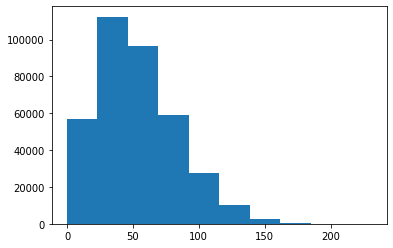

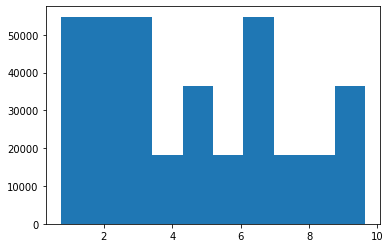

In [ ]:
plt.hist(df.sale_amount)
plt.show()
plt.hist(df.item_price)
plt.show()

In [ ]:
df.set_index('sale_date', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365200 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           365200 non-null  int64  
 1   sale_amount    365200 non-null  float64
 2   sale_id        365200 non-null  int64  
 3   store          365200 non-null  int64  
 4   store_address  365200 non-null  object 
 5   store_city     365200 non-null  object 
 6   store_state    365200 non-null  object 
 7   store_zipcode  365200 non-null  int64  
 8   item_brand     365200 non-null  object 
 9   item_name      365200 non-null  object 
 10  item_price     365200 non-null  float64
 11  item_upc12     365200 non-null  int64  
 12  item_upc14     365200 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 39.0+ MB


In [ ]:
df['month'] = df.index.month_name()
df['weekday'] = df.index.day_name()
df['sales_total'] = df.item_price * df.sale_amount

In [ ]:
df2['Date'] = pd.to_datetime(df2.Date)
df2.set_index('Date', inplace=True)

In [ ]:
df2.sample()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-09-14,1294.812,259.902,114.898,374.8


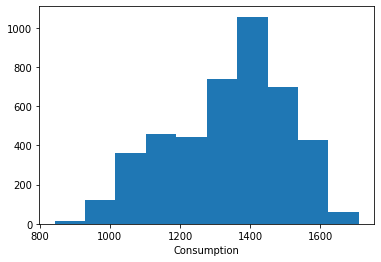

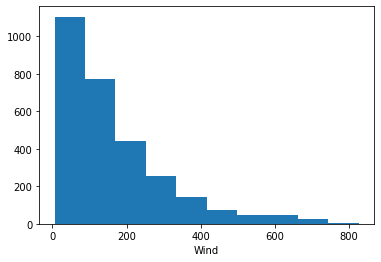

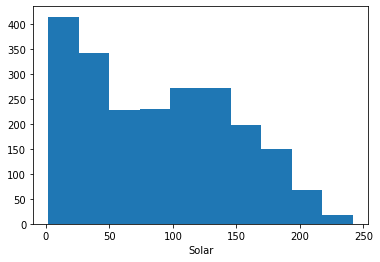

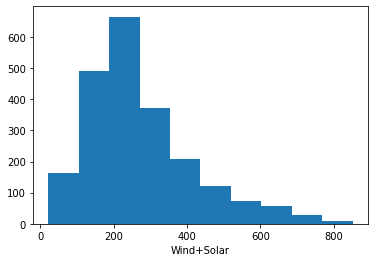

In [ ]:
for x in df2.columns:
  plt.hist(df2[x])
  plt.xlabel(x)
  plt.show()

In [ ]:
df2['month'] = df2.index.month_name()
df2['year'] = df2.index.year

In [ ]:
for x in df2.columns:
  try:
    df2[x] = df2[x].fillna(np.nanmedian(df2[x]))
  except:
    pass

df2.sample(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2008-02-07,1566.609,119.098,86.407,240.991,February,2008
2009-08-15,1011.462,119.098,86.407,240.991,August,2009


In [ ]:
df['date'] = df.index.date
df.sample(2)


,item,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total,date
sale_date,,,,,,,,,,,,,,,,,
2016-12-18 00:00:00+00:00,9,66.0,151180,3,2118 Fredericksburg Rdj,San Antonio,TX,78201,Van De Kamps,Van De Kamps Fillets Beer Battered - 10 Ct,1.79,19600923015,19600923015,December,Sunday,118.14,2016-12-18
2017-05-30 00:00:00+00:00,18,78.0,321161,6,1015 S WW White Rd,San Antonio,TX,78220,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,May,Tuesday,342.42,2017-05-30


# Exercises 4: Explore

In [ ]:
g = df.groupby(by='date').agg('sum').sales_total #not valid for non-cumulative columns

In [ ]:
g.to_csv(PATH + 'codeup_sales_datetime')
df2.to_csv(PATH + 'codeup_power_datetime')

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
g = pd.read_csv(PATH + 'codeup_sales_datetime', index_col=0)
df2 = pd.read_csv(PATH + 'codeup_power_datetime', index_col=0)

g.index = pd.to_datetime(g.index)
df2.index = pd.to_datetime(df2.index)

print(df2.sample())
print(g.sample())

            Consumption     Wind   Solar  Wind+Solar   month  year
Date                                                              
2009-08-09       948.65  119.098  86.407     240.991  August  2009
            sales_total
date                   
2016-05-30     52463.72


## Sales Data

In [ ]:
idx = int(.7 * df.shape[0])
df_train = g[:idx]
df_test = g[idx:]

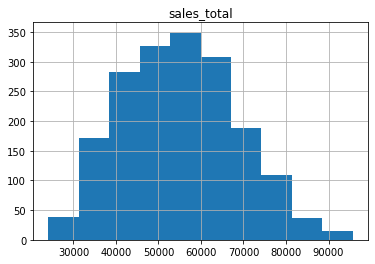

In [ ]:
df_train.hist();

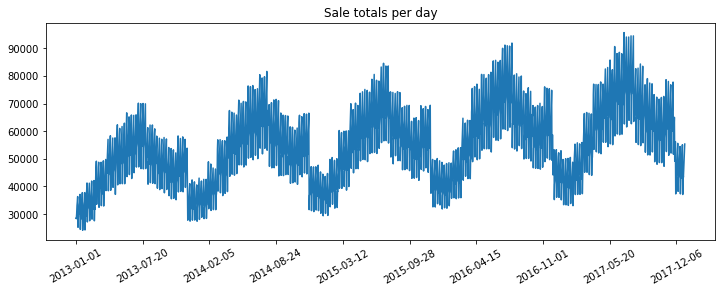

In [ ]:
x_ticks = df_train.index[range(0, len(df_train), 200)]

plt.figure(figsize=(12,4))
plt.plot(df_train.index, df_train.sales_total)
plt.xticks(x_ticks, rotation=30)
plt.title('Sale totals per day')
plt.show()

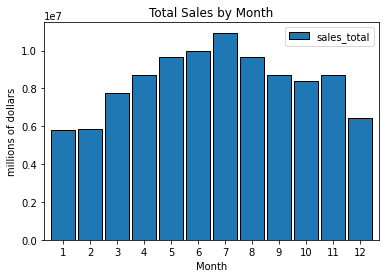

In [ ]:
ax = df_train.groupby(df_train.index.month).sum().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Total Sales by Month', xlabel='Month', ylabel='millions of dollars')
plt.show()

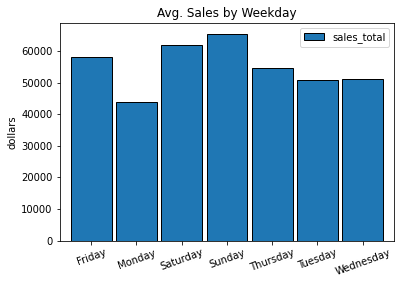

In [ ]:
ax = df_train.groupby(df_train.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=20)
ax.set(title='Avg. Sales by Weekday', xlabel='', ylabel='dollars')
plt.show()

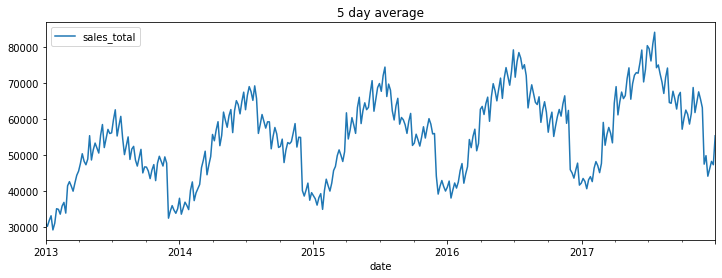

In [ ]:
df_train.resample('5D').mean().plot(title='5 day average', figsize=(12,4));

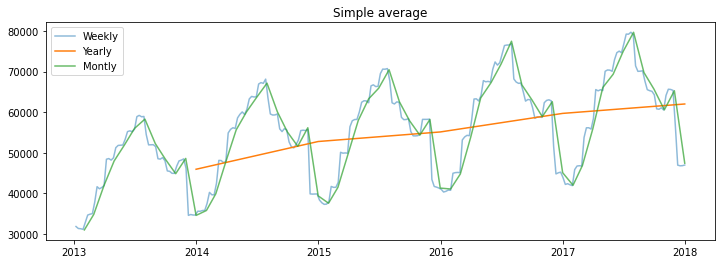

In [171]:
f, ax = plt.subplots(figsize=(12,4))
ax.plot(df_train.resample('W').mean(), alpha=.5, label='Weekly')
ax.plot(df_train.resample('Y').mean(), label='Yearly')
ax.plot(df_train.resample('M').mean(), alpha=.7, label='Montly')
plt.title('Simple average')
plt.legend()
plt.show()

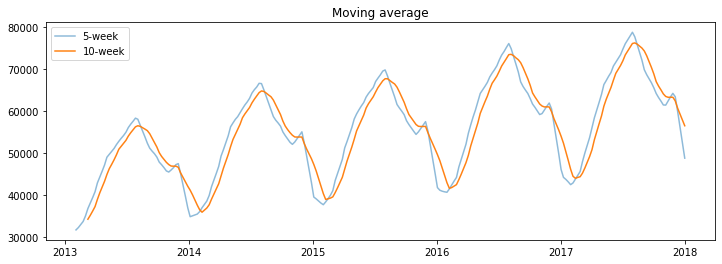

In [170]:
f, ax = plt.subplots(figsize=(12,4))
ax.plot(df_train.resample('W').mean().rolling(5).mean(), alpha=.5, label='5-week')
ax.plot(df_train.resample('W').mean().rolling(10).mean(), alpha=8, label='10-week')
plt.title('Moving average')
plt.legend()
plt.show()

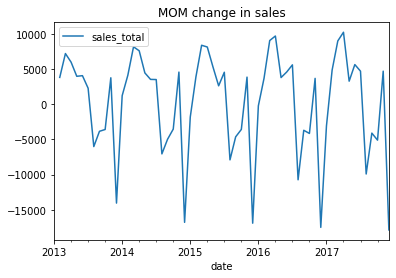

In [181]:
df_train.resample('M').mean().diff().plot(title='MOM change in sales');

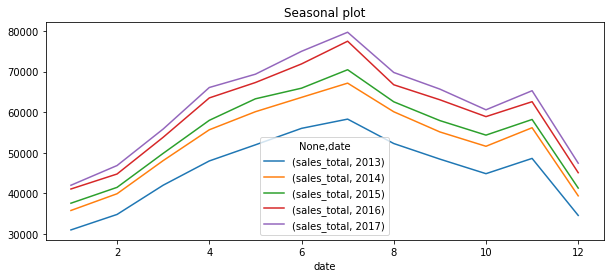

In [187]:
df_train.groupby([df_train.index.year,
                  df_train.index.month]).mean().unstack(0).plot(title='Seasonal plot',
                                                                figsize=(10,4));

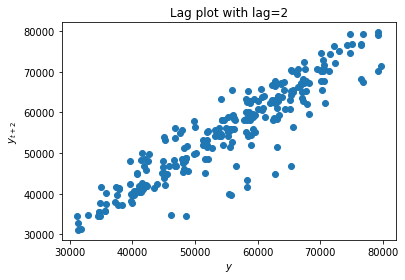

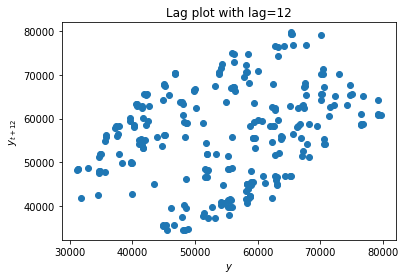

In [206]:
weekly = df_train.resample('W').mean()

plt.scatter(weekly, weekly.shift(-2))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 2}$')
plt.title('Lag plot with lag=2')
plt.show()
plt.scatter(weekly, weekly.shift(-12))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 12}$')
plt.title('Lag plot with lag=12')
plt.show()

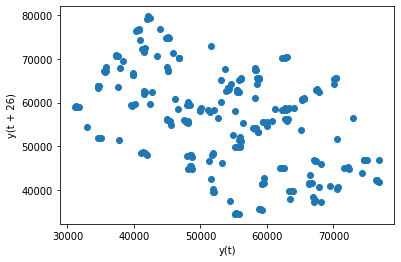

In [207]:
pd.plotting.lag_plot(weekly, lag=26);

Autocorrelation is a measure of the linear relationship between lagged values of a time series. An autocorrelation plot shows the correlation coefficient as a function of lag time. This can help us identify seasonality by looking at the peaks and valleys of the resulting visualization. The peaks can tells us the frequency with which the seasonality repeats itself, and the valleys show us where the correlation is the most negative.

The dashed lines are a way measure whether the observed autocorrelation is a meaningful signal or just white noise. If the majority of the peaks and valleys fall within the dashed lines, the time series is probably white noise.

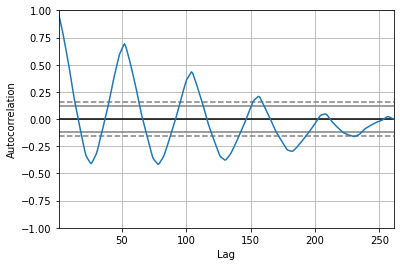

In [209]:
pd.plotting.autocorrelation_plot(weekly);

Seasonal decomposition is a fancy way to say that we can model time series as having 3 seperate components, the seasonal repeated cycle, the long term trend, and random noise1. There are two types of seasonal decomposition models, additive and multiplicative.

Additive seasonal decomposition model:
yt=St+Tt+Rt

Multiplicative model:
yt=St×Tt×Rt

We can use the seasonal_decompose function from the statsmodels library to perform this decomposition.

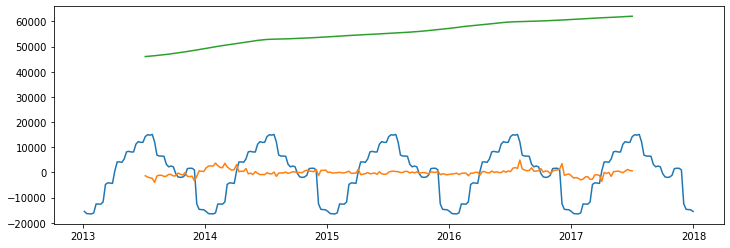

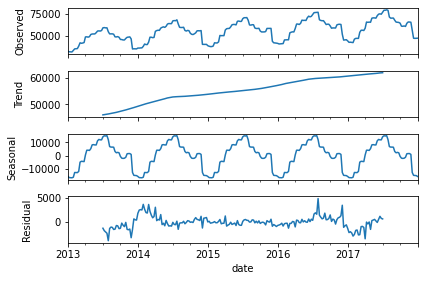

In [226]:
result = sm.tsa.seasonal_decompose(weekly)

f, ax = plt.subplots(figsize=(12,4))
ax.plot(result.seasonal)
ax.plot(result.resid)
ax.plot(result.trend)
plt.show()
result.plot()
plt.show()

In [236]:
daily = df_train.resample('D').mean()
# create a categorical feature
daily['temp_bin'] = pd.qcut(daily.sales_total, 3, labels=['hi', 'mid', 'lo'])
daily.groupby('temp_bin').mean()

,sales_total
temp_bin,
hi,40296.806059
mid,54651.660970
lo,70387.966010


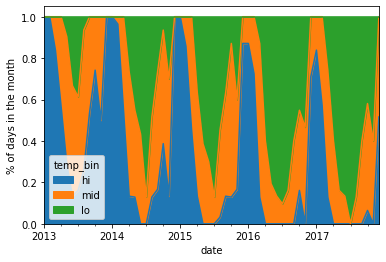

In [237]:
(daily.groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')
plt.show()

## German Power Data

In [ ]:
idx2 = int(.7 * df2.shape[0])
df2_train = df2[:idx2].Consumption
df2_test = df2[idx2:].Consumption

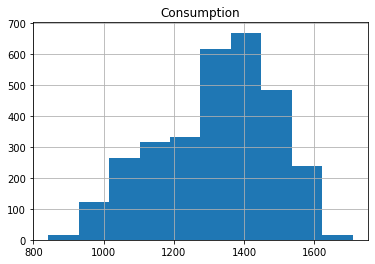

In [ ]:
df2_train.hist()
plt.title('Consumption');

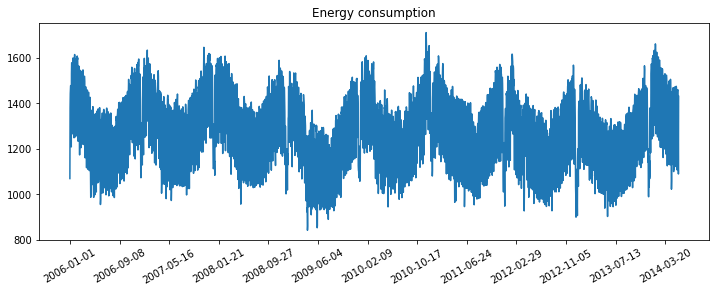

In [ ]:
x_ticks = df2_train.index[range(0, len(df2_train), 250)]

plt.figure(figsize=(12,4))
plt.plot(df2_train.index, df2_train.values)
plt.xticks(x_ticks, rotation=30)
plt.title('Energy consumption')
plt.show()

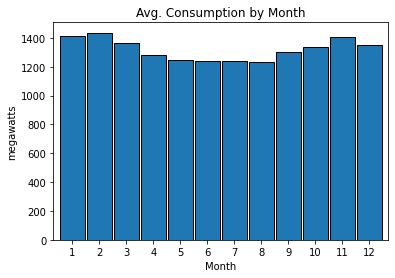

In [ ]:
ax = df2_train.groupby(df2_train.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Avg. Consumption by Month', xlabel='Month', ylabel='megawatts')
plt.show()

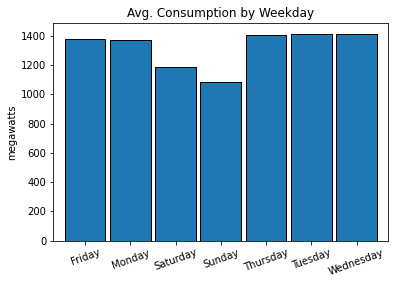

In [ ]:
ax = df2_train.groupby(df2_train.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=20)
ax.set(title='Avg. Consumption by Weekday', xlabel='', ylabel='megawatts')
plt.show()

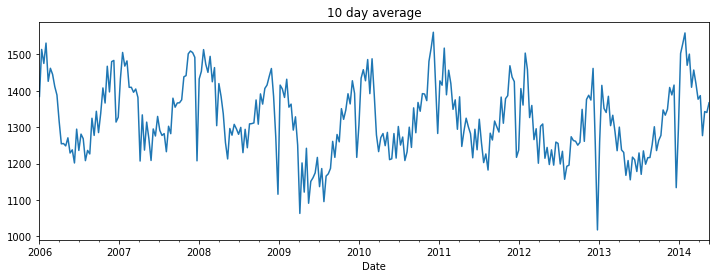

In [ ]:
df2_train.resample('10D').mean().plot(title='10 day average', figsize=(12,4));

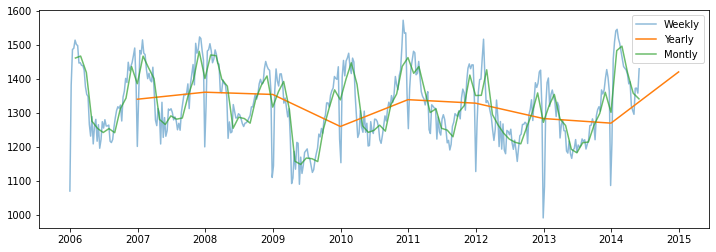

In [174]:
f, ax = plt.subplots(figsize=(12,4))
ax.plot(df2_train.resample('W').mean(), alpha=.5, label='Weekly')
ax.plot(df2_train.resample('Y').mean(), label='Yearly')
ax.plot(df2_train.resample('M').mean(), alpha=.7, label='Montly')
plt.legend()
plt.show()

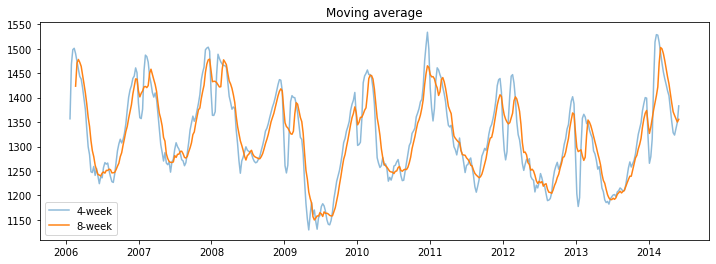

In [173]:
f, ax = plt.subplots(figsize=(12,4))
ax.plot(df2_train.resample('W').mean().rolling(4).mean(), alpha=.5, label='4-week')
ax.plot(df2_train.resample('W').mean().rolling(8).mean(), alpha=8, label='8-week')
plt.title('Moving average')
plt.legend()
plt.show()

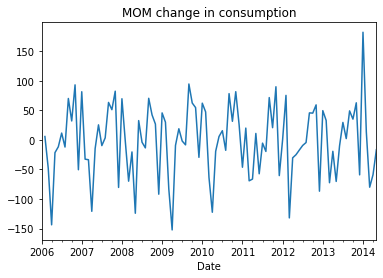

In [180]:
df2_train.resample('M').mean().diff().plot(title='MOM change in consumption');


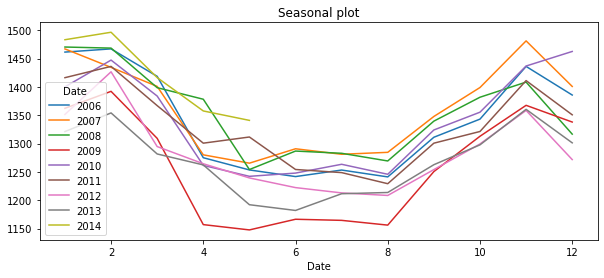

In [189]:
df2_train.groupby([df2_train.index.year,
                  df2_train.index.month]).mean().unstack(0).plot(title='Seasonal plot',
                                                                figsize=(10,4));

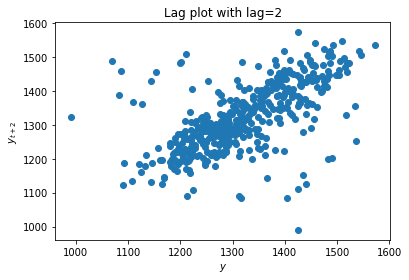

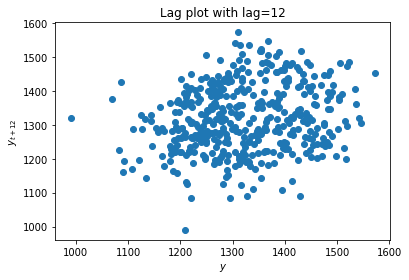

In [210]:
weekly2 = df2_train.resample('W').mean()
plt.scatter(weekly2, weekly2.shift(-2))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 2}$')
plt.title('Lag plot with lag=2')
plt.show()
plt.scatter(weekly2, weekly2.shift(-12))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 12}$')
plt.title('Lag plot with lag=12')
plt.show()

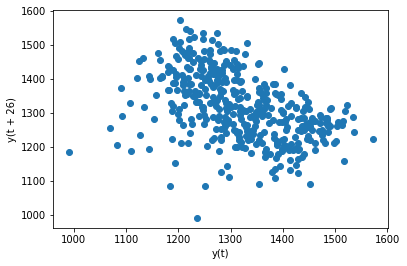

In [211]:
pd.plotting.lag_plot(weekly2, lag=26);

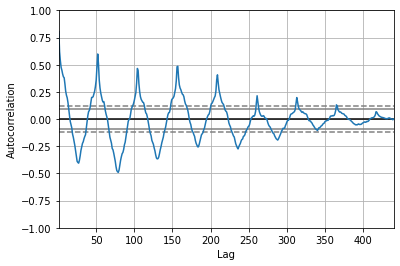

In [212]:
pd.plotting.autocorrelation_plot(weekly2);

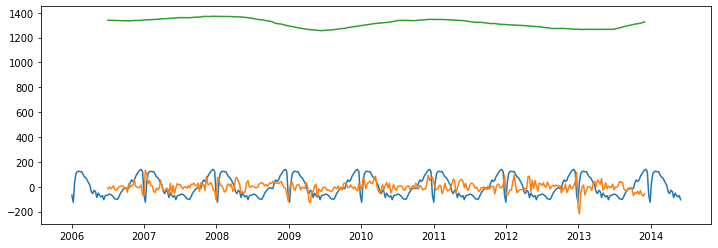

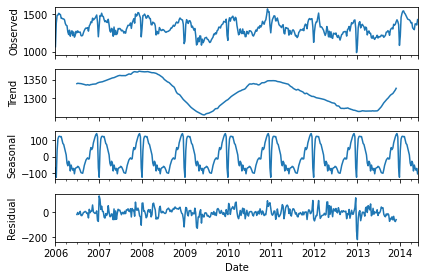

In [227]:
result2 = sm.tsa.seasonal_decompose(weekly2)

f, ax = plt.subplots(figsize=(12,4))
ax.plot(result2.seasonal)
ax.plot(result2.resid)
ax.plot(result2.trend)
plt.show()
result2.plot()
plt.show()

In [248]:
daily2 = pd.DataFrame(df2_train.resample('D').mean(), columns=['Consumption'])
# create a categorical feature
daily2['temp_bin'] = pd.qcut(daily2.Consumption, 3, labels=['hi', 'mid', 'lo'])
daily2.groupby('temp_bin').mean()

,Consumption
temp_bin,
hi,1125.874587
mid,1345.901834
lo,1493.085339


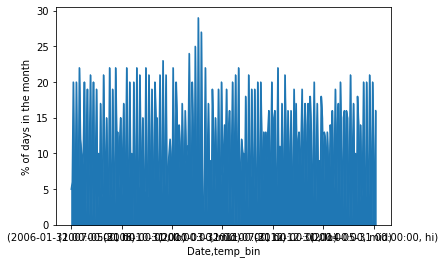

In [252]:
(daily2.groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 #.apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')
plt.show()